# Hand-Written Digits Recognition - ML

### Background:

The study of handwritten digits character recognition, also known as optical character recognition (OCR), is important for several reasons including document digitization, form processing, banking and finance, handwritten-based user authentication and so on. 

The task here is to correctly classify the handwritten digits in the MNIST dataset using Convolutional Neural Network (CNN). The dataset can be found at: http://yann.lecun.com/exdb/mnist/




 Import the necessary libraries

In [1]:
from keras.datasets import mnist
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


## Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
 Digits_ = ['Digit 0', 'Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5', 'Digit 6', 'Digit 7', 'Digit 8', 'Digit 9']

Take a look at sample images

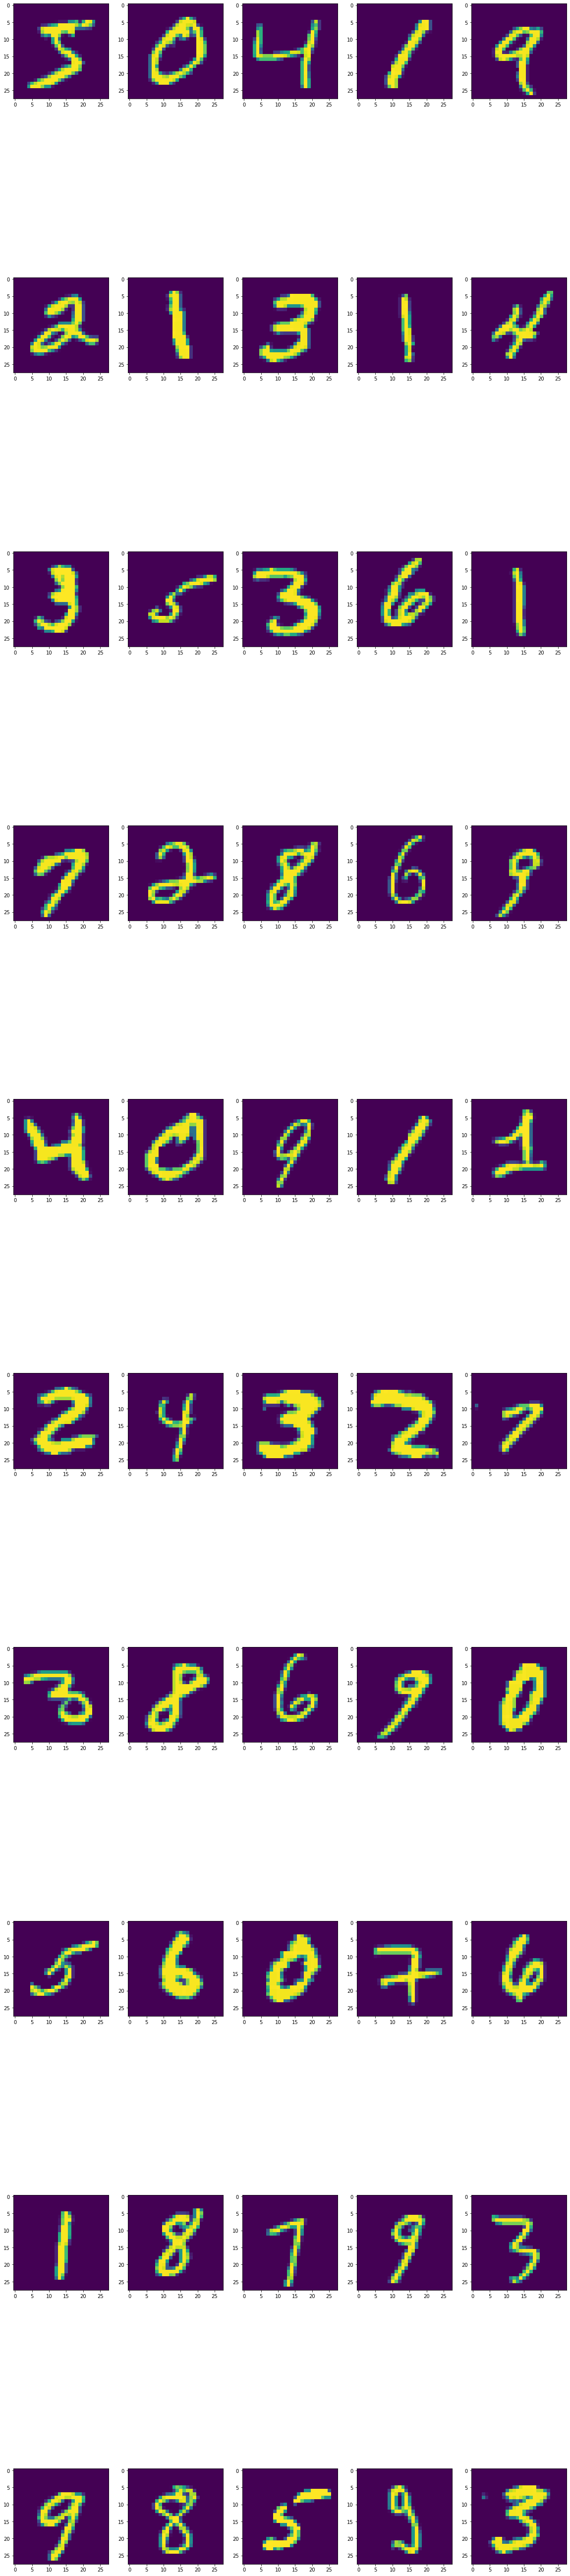

In [4]:
fig, axs = plt.subplots(1, 15, figsize=(20, 100))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(x_train[i])

## Check Image Details

In [5]:
print(x_train.shape)
print(x_train[1].shape)
print(y_train.shape)
print(y_train[1].shape)

(60000, 28, 28)
(28, 28)
(60000,)
()


## Declare Adjustable Model Variables

In [10]:
x_train_size = (28, 28) 
batchSize = 60
epochssize = 6

## Build Model - One Conv without Regularization

In [11]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1), padding= 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
history = model.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 19s 18ms/step - loss: 28.1102 - accuracy: 0.1070 - val_loss: 2.3036 - val_accuracy: 0.1010
Epoch 2/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3051 - accuracy: 0.1069 - val_loss: 2.3062 - val_accuracy: 0.1135
Epoch 3/6
1000/1000 [==============================] - 21s 21ms/step - loss: 2.3050 - accuracy: 0.1055 - val_loss: 2.3037 - val_accuracy: 0.1135
Epoch 4/6
1000/1000 [==============================] - 19s 19ms/step - loss: 2.3050 - accuracy: 0.1066 - val_loss: 2.3039 - val_accuracy: 0.0974
Epoch 5/6
1000/1000 [==============================] - 19s 19ms/step - loss: 2.3051 - accuracy: 0.1060 - val_loss: 2.3054 - val_accuracy: 0.1028
Epoch 6/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3046 - accuracy: 0.1060 - val_loss: 2.3030 - val_accuracy: 0.1135


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3030459880828857
Test accuracy: 0.11349999904632568


In [114]:
# plt.figure(figsize = (10,8))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - One Layer No Reg')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize = (10,8))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy - One Layer No Reg')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

## Build Model - One Conv with Batch Normalization

In [17]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())


#model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,538
Trainable params: 54,474
Non-trai

In [19]:
model.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [20]:
history = model.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 26s 25ms/step - loss: 71.1507 - accuracy: 0.8787 - val_loss: 31.2706 - val_accuracy: 0.8826
Epoch 2/6
1000/1000 [==============================] - 26s 26ms/step - loss: 30.4955 - accuracy: 0.9285 - val_loss: 41.3809 - val_accuracy: 0.9419
Epoch 3/6
1000/1000 [==============================] - 28s 28ms/step - loss: 32.8261 - accuracy: 0.9290 - val_loss: 23.2695 - val_accuracy: 0.9449
Epoch 4/6
1000/1000 [==============================] - 27s 27ms/step - loss: 32.3544 - accuracy: 0.9312 - val_loss: 29.3587 - val_accuracy: 0.9437
Epoch 5/6
1000/1000 [==============================] - 26s 26ms/step - loss: 30.4360 - accuracy: 0.9352 - val_loss: 29.2102 - val_accuracy: 0.9442
Epoch 6/6
1000/1000 [==============================] - 28s 28ms/step - loss: 19.7152 - accuracy: 0.9446 - val_loss: 20.9494 - val_accuracy: 0.9505


In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 20.949378967285156
Test accuracy: 0.9505000114440918


In [115]:
# plt.figure(figsize = (10,8))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - One Layer with Batch Norm')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize = (10,8))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy - One Layer with Batch Norm')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

## Build Model - One Conv with Dropout 

In [23]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1),padding = 'same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(layers.Dropout(0.5))

#model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
__________________________________________________

In [25]:
model.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [26]:
history = model.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 21s 21ms/step - loss: 29.5979 - accuracy: 0.1065 - val_loss: 2.3038 - val_accuracy: 0.1009
Epoch 2/6
1000/1000 [==============================] - 21s 21ms/step - loss: 2.3047 - accuracy: 0.1060 - val_loss: 2.3048 - val_accuracy: 0.1009
Epoch 3/6
1000/1000 [==============================] - 21s 21ms/step - loss: 2.3044 - accuracy: 0.1064 - val_loss: 2.3031 - val_accuracy: 0.1010
Epoch 4/6
1000/1000 [==============================] - 24s 24ms/step - loss: 2.3053 - accuracy: 0.1056 - val_loss: 2.3057 - val_accuracy: 0.1010
Epoch 5/6
1000/1000 [==============================] - 23s 23ms/step - loss: 2.3051 - accuracy: 0.1054 - val_loss: 2.3067 - val_accuracy: 0.1028
Epoch 6/6
1000/1000 [==============================] - 21s 21ms/step - loss: 2.3052 - accuracy: 0.1034 - val_loss: 2.3066 - val_accuracy: 0.1135


In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3065807819366455
Test accuracy: 0.11349999904632568


In [116]:
# plt.figure(figsize = (10,8))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - One Layer with Dropout')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize = (10,8))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy - One Layer with Dropout')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

## Build Model - One Conv with Early Stopping

In [29]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)


In [32]:
model.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [33]:
history = model.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test),callbacks=[early_stop])

Epoch 1/6
1000/1000 [==============================] - 18s 18ms/step - loss: 45.6506 - accuracy: 0.1050 - val_loss: 2.3044 - val_accuracy: 0.1009
Epoch 2/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3050 - accuracy: 0.1078 - val_loss: 2.3104 - val_accuracy: 0.1009
Epoch 3/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3052 - accuracy: 0.1053 - val_loss: 2.3041 - val_accuracy: 0.1032
Epoch 4/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3054 - accuracy: 0.1048 - val_loss: 2.3084 - val_accuracy: 0.1010
Epoch 5/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3049 - accuracy: 0.1044 - val_loss: 2.3037 - val_accuracy: 0.1135
Epoch 6/6
1000/1000 [==============================] - 18s 18ms/step - loss: 2.3046 - accuracy: 0.1063 - val_loss: 2.3052 - val_accuracy: 0.1135


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3052315711975098
Test accuracy: 0.11349999904632568


In [117]:
# plt.figure(figsize = (10,8))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - One Layer with Early Stopping')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize = (10,8))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy - One Layer with Early Stopping')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

## Build Model - Two Conv 

In [36]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                      

In [38]:
model.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
history = model.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 28s 27ms/step - loss: 0.3409 - accuracy: 0.9362 - val_loss: 0.0900 - val_accuracy: 0.9740
Epoch 2/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.1058 - accuracy: 0.9695 - val_loss: 0.0910 - val_accuracy: 0.9737
Epoch 3/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0875 - accuracy: 0.9741 - val_loss: 0.0838 - val_accuracy: 0.9740
Epoch 4/6
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0760 - accuracy: 0.9774 - val_loss: 0.0777 - val_accuracy: 0.9750
Epoch 5/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0692 - accuracy: 0.9794 - val_loss: 0.0711 - val_accuracy: 0.9789
Epoch 6/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 0.0780 - val_accuracy: 0.9762


In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07801827043294907
Test accuracy: 0.9761999845504761


In [118]:
# plt.figure(figsize = (10,8))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - 2 Convolutional Layers')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize = (10,8))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy - 2 Convolutional Layers')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

## Build Model - Three Conv 

In [131]:
model_1 = Sequential()

#layer 1
model_1.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model_1.add(Dense(10,activation = 'softmax'))

In [132]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 batch_normalization_14 (Bat  (None, 3, 3, 32)       

In [133]:
model_1.compile(optimizer= SGD(learning_rate=0.1, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [134]:
history = model_1.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 23s 22ms/step - loss: 0.2543 - accuracy: 0.9197 - val_loss: 0.3267 - val_accuracy: 0.9004
Epoch 2/6
1000/1000 [==============================] - 21s 21ms/step - loss: 0.1037 - accuracy: 0.9677 - val_loss: 0.0910 - val_accuracy: 0.9711
Epoch 3/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 4/6
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0664 - accuracy: 0.9801 - val_loss: 0.1077 - val_accuracy: 0.9674
Epoch 5/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0888 - val_accuracy: 0.9766
Epoch 6/6
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0598 - val_accuracy: 0.9819


In [135]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05979553237557411
Test accuracy: 0.9818999767303467


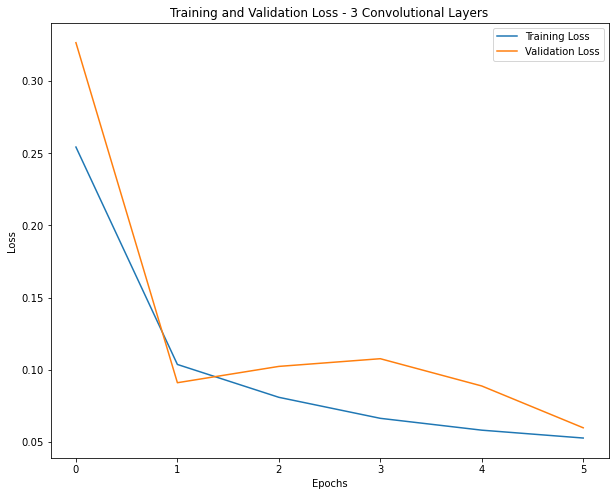

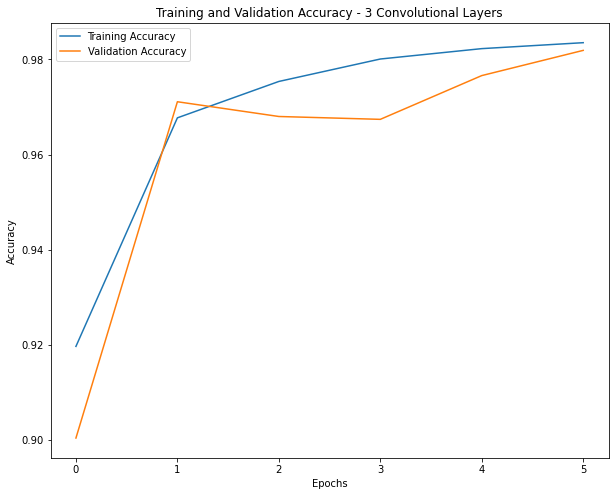

In [136]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - 3 Convolutional Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - 3 Convolutional Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build Model - Learning Rate 0.01

In [137]:
model_01 = Sequential()

#layer 1
model_01.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model_01.add(MaxPooling2D(pool_size=(2,2)))

model_01.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_01.add(MaxPooling2D(pool_size=(2,2)))

model_01.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_01.add(BatchNormalization())
model_01.add(MaxPooling2D(pool_size=(2,2)))

model_01.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model_01.add(Dense(10,activation = 'softmax'))

In [138]:
model_01.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 batch_normalization_15 (Bat  (None, 3, 3, 32)       

In [139]:
model_01.compile(optimizer= SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [140]:
history = model_01.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 25s 24ms/step - loss: 0.1822 - accuracy: 0.9455 - val_loss: 0.0881 - val_accuracy: 0.9731
Epoch 2/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.0736 - val_accuracy: 0.9766
Epoch 3/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0547 - accuracy: 0.9838 - val_loss: 0.0742 - val_accuracy: 0.9756
Epoch 4/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 5/6
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.0498 - val_accuracy: 0.9856
Epoch 6/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0517 - val_accuracy: 0.9832


In [141]:
score = model_01.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05174035206437111
Test accuracy: 0.9832000136375427


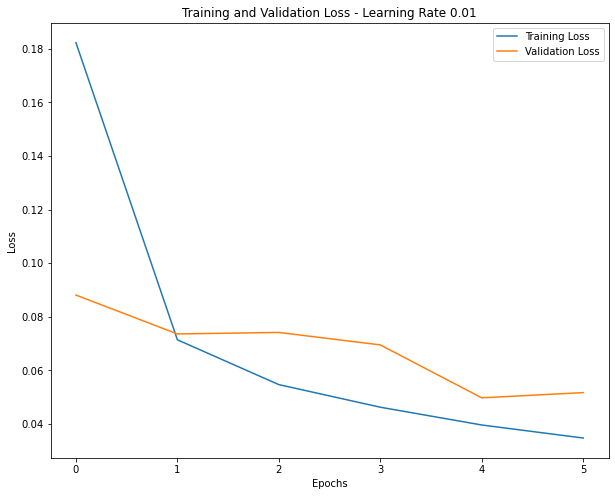

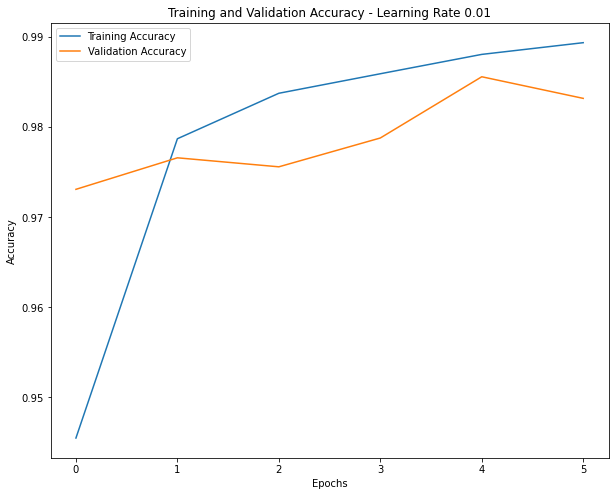

In [142]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Learning Rate 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Learning Rate 0.01')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build Model - Learning Rate 0.001

In [143]:
model_001 = Sequential()

#layer 1
model_001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model_001.add(MaxPooling2D(pool_size=(2,2)))

model_001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_001.add(MaxPooling2D(pool_size=(2,2)))

model_001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_001.add(BatchNormalization())
model_001.add(MaxPooling2D(pool_size=(2,2)))

model_001.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model_001.add(Dense(10,activation = 'softmax'))

In [144]:
model_001.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 batch_normalization_16 (Bat  (None, 3, 3, 32)       

In [145]:
model_001.compile(optimizer= SGD(learning_rate=0.001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [146]:
history = model_001.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 25s 24ms/step - loss: 0.3817 - accuracy: 0.8949 - val_loss: 0.1607 - val_accuracy: 0.9580
Epoch 2/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.1447 - accuracy: 0.9601 - val_loss: 0.1162 - val_accuracy: 0.9679
Epoch 3/6
1000/1000 [==============================] - 26s 26ms/step - loss: 0.1085 - accuracy: 0.9691 - val_loss: 0.0909 - val_accuracy: 0.9741
Epoch 4/6
1000/1000 [==============================] - 27s 27ms/step - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.0907 - val_accuracy: 0.9748
Epoch 5/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0768 - accuracy: 0.9777 - val_loss: 0.0866 - val_accuracy: 0.9749
Epoch 6/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0674 - accuracy: 0.9803 - val_loss: 0.0733 - val_accuracy: 0.9781


In [147]:
score = model_001.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0733150914311409
Test accuracy: 0.9781000018119812


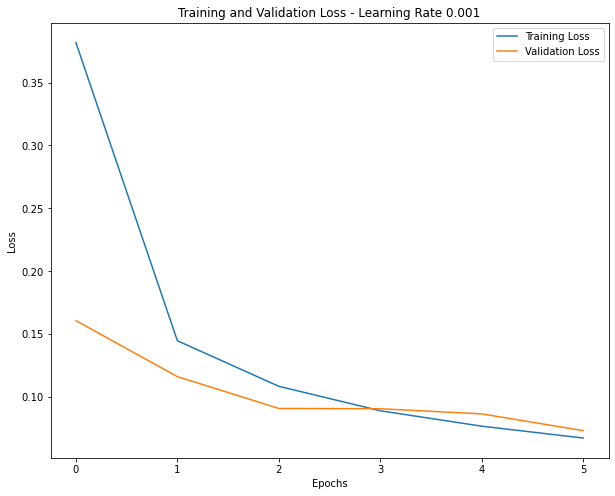

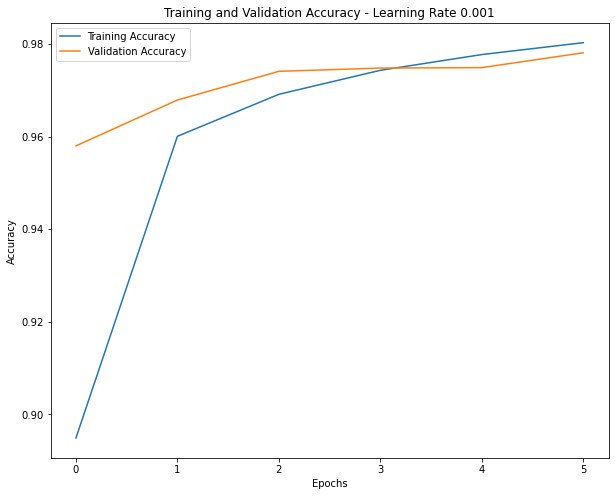

In [148]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Learning Rate 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Learning Rate 0.001')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build Model - Learning Rate 0.0001

In [149]:
model_0001 = Sequential()

#layer 1
model_0001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)))
model_0001.add(MaxPooling2D(pool_size=(2,2)))

model_0001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_0001.add(MaxPooling2D(pool_size=(2,2)))

model_0001.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model_0001.add(BatchNormalization())
model_0001.add(MaxPooling2D(pool_size=(2,2)))

model_0001.add(Flatten())

#model.add(Dense(128,activation = 'relu'))
model_0001.add(Dense(10,activation = 'softmax'))

In [150]:
model_0001.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 batch_normalization_17 (Bat  (None, 3, 3, 32)       

In [151]:
model_0001.compile(optimizer= SGD(learning_rate=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [152]:
history = model_0001.fit(x = x_train,y = y_train, batch_size = batchSize,epochs = epochssize, validation_data= (x_test,y_test))

Epoch 1/6
1000/1000 [==============================] - 30s 29ms/step - loss: 1.0191 - accuracy: 0.7023 - val_loss: 0.5309 - val_accuracy: 0.8582
Epoch 2/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.4521 - accuracy: 0.8795 - val_loss: 0.3627 - val_accuracy: 0.9009
Epoch 3/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3406 - accuracy: 0.9089 - val_loss: 0.2922 - val_accuracy: 0.9227
Epoch 4/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2828 - accuracy: 0.9245 - val_loss: 0.2489 - val_accuracy: 0.9320
Epoch 5/6
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2458 - accuracy: 0.9341 - val_loss: 0.2160 - val_accuracy: 0.9398
Epoch 6/6
1000/1000 [==============================] - 28s 28ms/step - loss: 0.2196 - accuracy: 0.9407 - val_loss: 0.2060 - val_accuracy: 0.9405


In [153]:
score = model_0001.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.206017404794693
Test accuracy: 0.940500020980835


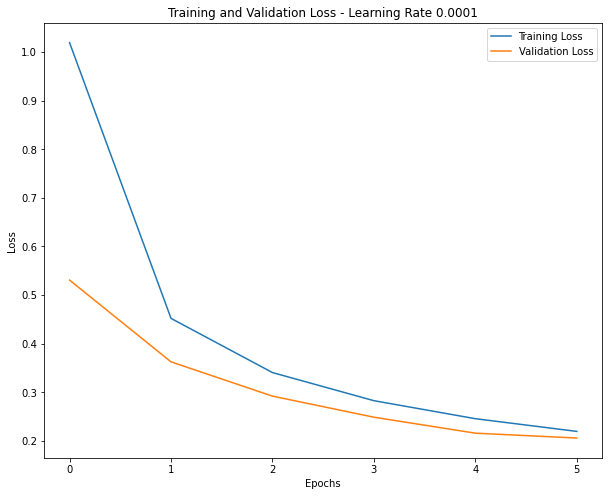

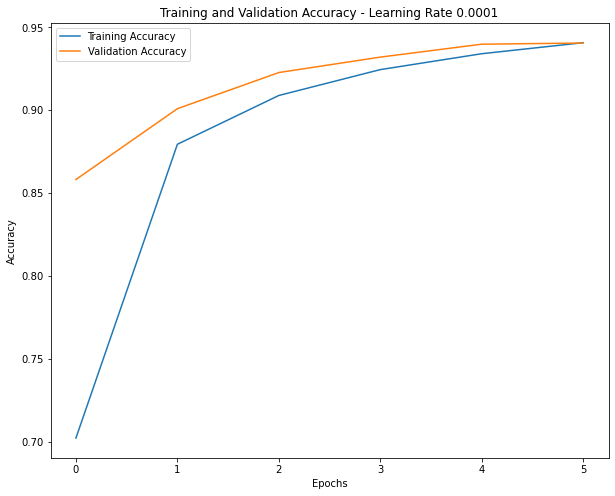

In [154]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Learning Rate 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Learning Rate 0.0001')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Predict with the best version of the Model

In [155]:
 y_pred = np.argmax(model_001.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


## Visualise the Result

In [156]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 700x700 with 0 Axes>

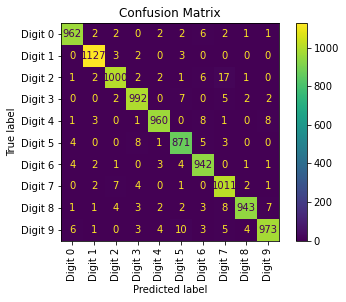

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
classes_ = Digits_
plt.figure(dpi=100, figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=Digits_)
plt.title('Confusion Matrix')
tick_marks = np.arange(len(classes_))
plt.xticks(tick_marks, classes_, rotation=90)
plt.show()

## Consider answering the following questions from the codes written above:

a) How did the use of different regularisation methods affect the performance of your CNN model?

b) Report how changes to the number of convolution blocks affect the performance of your model quantitatively?

c) What is the effect of varying learning rates on the performance of the CNN algorithm.



### Question A answer

Three regularization techniques were utilized at the early stages of model building. The
techniques are:
    
1.Batch Normalization

2.Early Stopping

3.Dropout


Batch Normalization technique has the highest Validation Accuracy
Loss. Other regularization techniques have a low accuracy and loss. High losses indicates
that the model is performing poorly at predicting minority classes. However, a high
accuracy indicates that the model is predicting the correct output for the input data
majority of the times. Batch Normalization is the preferred
regularization technique for this data set due to its extremely high accuracy compared
to the rest of the regularization techniques.

### Question B answer

Three different convolution blocks were utilized to create a model.

The validation accuracy increases while the validation loss reduces with every increase in
the convolutional block. 

However, with more blocks added, we may begin to see a decline in the accuracy and an
increase in validation loss due to overfitting. It also increases the complexity of the
model.

### Question C answer

Four learning rates were varied while building the model. From the figure, although a learning rate of 0.01 had the highest accuracy,
it proved to be prone to overfitting. As a result, it was not selected as the best learning
fit for the model. The learning rate of 0.001 proved to be the best in this scenario
because it has the highest accuracy and was not prone to overfitting. As the learning rate
reduces after 0.01, the accuracy reduces while the loss increases. This means as the
learning rate reduces, the model accuracy increases while losses drop until the optimum
learning rate is reached. Afterwards, the reverse begins to happen.